Epoch: 1...
Epoch: 2...
Epoch: 3...
Epoch: 4...
Epoch: 5...
Epoch: 6...
Epoch: 7...
Epoch: 8...
Epoch: 9...
Epoch: 10...
Epoch: 11...
Epoch: 12...
Epoch: 13...
Epoch: 14...
Epoch: 15...
Epoch: 16...
Epoch: 17...
Epoch: 18...
Epoch: 19...
Epoch: 20...
Epoch: 21...
Epoch: 22...
Epoch: 23...
Epoch: 24...
Epoch: 25...
Epoch: 26...
Epoch: 27...
Epoch: 28...
Epoch: 29...
Epoch: 30...
Epoch: 31...
Epoch: 32...
Epoch: 33...
Epoch: 34...
Epoch: 35...
Epoch: 36...
Epoch: 37...
Epoch: 38...
Epoch: 39...
Epoch: 40...
Epoch: 41...
Epoch: 42...
Epoch: 43...
Epoch: 44...
Epoch: 45...
Epoch: 46...
Epoch: 47...
Epoch: 48...
Epoch: 49...
Epoch: 50...


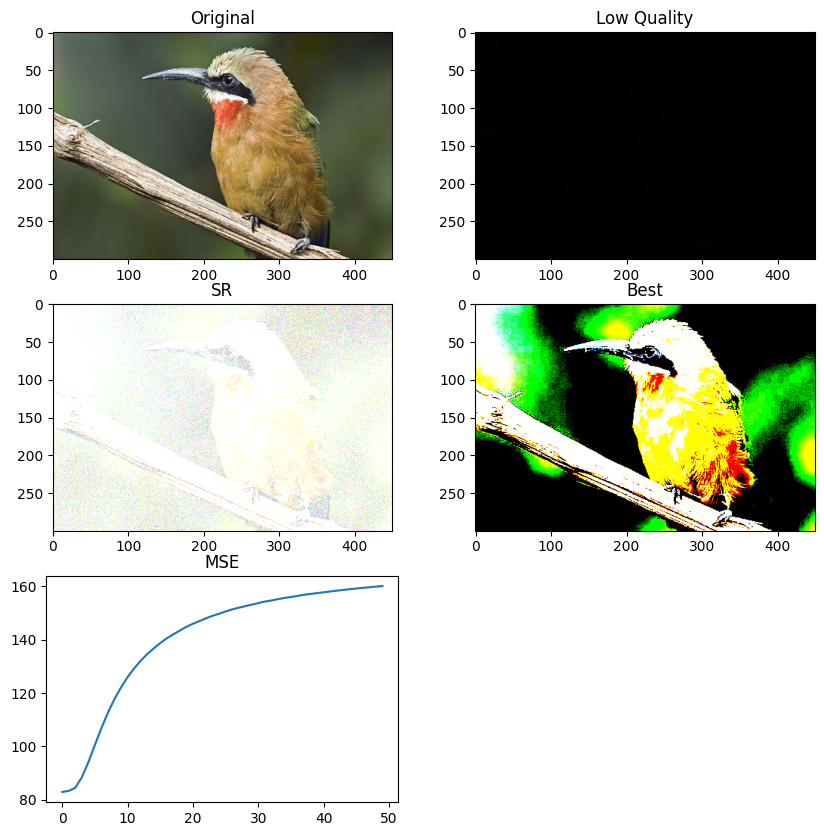

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
reference = cv2.imread("image.jpg")
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)
M, N, C = reference.shape

# Create a low-quality version of the image
low_quality = reference * 0.01

# Calculate the threshold
threshold = np.sum(low_quality) / (M * N * C)

# Initialize variables
mse = np.zeros(50)
sigma = 0
SR = np.zeros((M, N, C))
best = np.zeros((M, N, C))

# Loop over epochs
for epoch in range(50):
    print(f"Epoch: {epoch + 1}...")
    sigma += 0.1
    temp_SR = np.zeros_like(SR)
    for _ in range(10):
        noisy = sigma * np.random.rand(M, N, C) + low_quality
        modified = np.zeros_like(noisy)
        for c in range(C):
            for i in range(M):
                for j in range(N):
                    if noisy[i, j, c] > threshold:
                        modified[i, j, c] = 255
                    else:
                        modified[i, j, c] = 0
        temp_SR += modified
    temp_SR /= 10
    SR = temp_SR.copy()
    error = reference - SR
    mse[epoch] = np.sum(error**2) / (M * N * C)
    mse[epoch] = np.sqrt(mse[epoch])

    if epoch == 0 or mse[epoch] < mse[epoch - 1]:
        best = SR.copy()

# Convert SR and best to uint8 for display
SR = np.clip(SR, 0, 255).astype(np.uint8)
best = np.clip(best, 0, 255).astype(np.uint8)

# Plot the results
plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.title("Original")
plt.imshow(reference)
plt.subplot(322)
plt.title("Low Quality")
plt.imshow(low_quality.astype(np.uint8))
plt.subplot(323)
plt.title("SR")
plt.imshow(SR)
plt.subplot(324)
plt.title("Best")
plt.imshow(best)
plt.subplot(325)
plt.title("MSE")
plt.plot(mse)
plt.show()